<font color='red'>
Grade: 100
    
Preprocessing Emails: Good
    
Vocabulary List: Good
    
Extracting Features from Emails: Good
    
Training SVM for Spam Classification: Good

In [1]:
#Import library

import numpy as np
import scipy as sp
import pandas as pd
import sklearn.linear_model
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score, precision_recall_curve, auc
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import re
from nltk.stem import PorterStemmer

In [2]:
#Check Working directory location
import os
print(os.getcwd())

/Users/yaningliu/OneDrive - The University of Colorado Denver/CUDenver_Courses/MATH40275027_MachineLearning_Spring2021/Homework/StudentHW/Midterm_Project_Sec001


### Problem 1 Preprocessing Emails (20 pts)

In [3]:
#Load example email
email_0 = open('email1.txt', 'r').read()

In [4]:
# Check individual processing code as a test
#email = email_0
# email = email.lower()
# email = re.sub(r'(http|https)://[^\s]*','httpaddr', email)
# email = re.sub('[^\s]+@[^\s]+', 'emailaddr', email)
# email = re.sub('[0-9]+', 'number', email)
# email = re.sub('[$]+', 'dollar', email)
# ps = PorterStemmer()
# email = " ".join([ps.stem(word) for word in email.split()])
# email = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', email)
# email = re.sub(r'\s+',' ', email)
# email = email.strip()
# print(email)

In [5]:
#Write function for ProcessEmail
def ProcessEmail(x):
    x = x.lower()
    x = re.sub(r'(http|https)://[^\s]*','httpaddr', x)
    x = re.sub('[^\s]+@[^\s]+', 'emailaddr', x)
    x = re.sub('[0-9]+', 'number', x)
    x = re.sub('[$]+', 'dollar', x)
    x = re.sub(r'[\'\"@$%/#.:,&*+=?!\[\](){}>_<]', '', x) #this needs to come before porter stemmer in order to get same result, otherwise you get dollarnumber instead of dollarnumb
    ps = PorterStemmer()
    x = " ".join([ps.stem(word) for word in x.split()])
    x = re.sub(r'\s+',' ', x)
    x = x.strip()
    return x;

In [6]:
#Use function
email_new = ProcessEmail(email_0)
print(email_new)

anyon know how much it cost to host a web portal well it depend on how mani visitor your expect thi can be anywher from less than number buck a month to a coupl of dollarnumb you should checkout httpaddr or perhap amazon ecnumb if your run someth big to unsubscrib yourself from thi mail list send an email to emailaddr


In [7]:
#Just to take a look at original email
print(email_0)

> Anyone knows how much it costs to host a web portal ?
>
Well, it depends on how many visitors you're expecting.
This can be anywhere from less than 10 bucks a month to a couple of $100. 
You should checkout http://www.rackspace.com/ or perhaps Amazon EC2 
if youre running something big..

To unsubscribe yourself from this mailing list, send an email to:
groupname-unsubscribe@egroups.com




### Problem 2 Vocabulary List (25 pts)

In [8]:
#Load data
vocab = pd.read_csv('vocab.txt', delim_whitespace=True, names=['index', 'word'])
#Check head
vocab.head(10)

,index,word
0,1,aa
1,2,ab
2,3,abil
3,4,abl
4,5,about
5,6,abov
6,7,absolut
7,8,abus
8,9,ac
9,10,accept


In [9]:
#for loop test
# play = []
#
# for x in test:
#     if x in z:
#         number = z.index(x)
#         play.append(number+1)
# print(play)

In [10]:
#Write function for EmailToIndices
def EmailToIndices(processed_email, vocab_df):
    word_list = processed_email.split()
    vocab_map = list(vocab_df['word'])
    index_list = []
    for x in word_list:
        if x in vocab_map:
            number = vocab_map.index(x)
            index_list.append(number+1)
    return index_list

In [11]:
#Use function
email_index = EmailToIndices(email_new,vocab)
email_index

[86,
 916,
 794,
 1077,
 883,
 370,
 1699,
 790,
 1822,
 1831,
 883,
 431,
 1171,
 794,
 1002,
 1895,
 592,
 1676,
 238,
 162,
 89,
 688,
 945,
 1663,
 1120,
 1062,
 1699,
 375,
 1162,
 479,
 1893,
 1510,
 799,
 1182,
 1237,
 810,
 1895,
 1440,
 1547,
 181,
 1699,
 1758,
 1896,
 688,
 1676,
 992,
 961,
 1477,
 71,
 530,
 1699,
 531]

### Problem 3 Extracting Features from Emails (25 pts)

In [12]:
#Write Feature Extraction function
def FeatureExtraction(indices, vocab_df):
    feature = np.zeros(len(vocab_df), dtype=int)
    true_index = [x - 1 for x in indices]
    for x in true_index:
        feature[x]=1
    return feature

In [13]:
#Use function to get the feature vector
feature = FeatureExtraction(email_index, vocab)

#Report the number of nonzeros in the vector and the size of the vector
print(feature.sum())
print(feature.size)

44
1899


The number of nonzeros in the vector is 44 and the size of the vector is 1899. Even though there are 52 indices, some of them have duplicates, therefore the feature vector only has 44 non-zeros.

### Problem 4 Training SVM for Spam Classification (30 pts)

In [14]:
#Load data
spamTest = np.load("spamTest.npy")
spamTrain = np.load("spamTrain.npy")

In [15]:
#Extract Target of Test Set and Train Set
y_train = spamTrain[:,-1]
y_test = spamTest[:,-1]

#Extract features of Test Set and Train Set
X_train = spamTrain[:,:-1]
X_test = spamTest[:, :-1]

#Double check the shapes of the arrays
print(spamTrain.shape)
print(X_train.shape)
print(y_train.shape)
print(spamTest.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 1900)
(4000, 1899)
(4000,)
(1000, 1900)
(1000, 1899)
(1000,)


#### Part 1

In [16]:
#Build linear SVM classifier
#NOT scaling the data as they are dummy variables
C = [0.05, 1, 2]

for i in C:
    svm_clf = LinearSVC(C=i, loss = "hinge", random_state = 10)
    svm_clf.fit(X_train, y_train)
    accuracy = svm_clf.score(X_test,y_test)
    print('When C=',i,', accuracy score=',accuracy)

When C= 0.05 , accuracy score= 0.992
When C= 1 , accuracy score= 0.977
When C= 2 , accuracy score= 0.974


The best model is when C=0.05. It has the highest accuracy score of 0.992 on the test set.

#### Part 2

In [17]:
#Set the SVM model using the best model
svm_clf = LinearSVC(C=0.05, loss = "hinge", random_state = 10)
svm_clf.fit(X_train, y_train)

#Check the feature weights of the model
w = svm_clf.coef_
print(w)

#Get the absolute values of weights
w_abs = abs(w)
print(w_abs)

[[ 0.01187593  0.00976858  0.04649473 ... -0.06861079 -0.00977659
   0.04555508]]
[[0.01187593 0.00976858 0.04649473 ... 0.06861079 0.00977659 0.04555508]]


In [18]:
#Check shape of the array for the absolute values of weight
print(w_abs.shape)

#Convert the abs weight array into a 1d array
w_abs_1d = w_abs.flatten()
print(w_abs_1d.shape)

#Round the weight to make it easier to read
w_abs_1d = np.around(w_abs_1d,4)
print(w_abs_1d)

(1, 1899)
(1899,)
[0.0119 0.0098 0.0465 ... 0.0686 0.0098 0.0456]


Text(0.5, 1.0, 'Absolute values of w (weights) versus its indices')

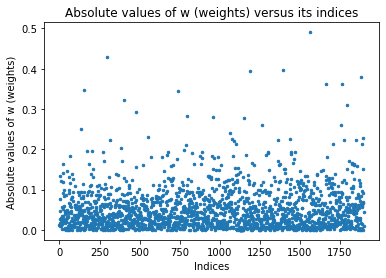

In [19]:
#Make a Plot of the abs weight and its indices
indices = np.arange(0,1899,1)
plt.plot(indices,w_abs_1d,".", markersize=5)
plt.xlabel("Indices")
plt.ylabel("Absolute values of w (weights)")
plt.title("Absolute values of w (weights) versus its indices")

As shown in the plot above, some of the weights are significantly larger than the rest of the weights. So some of the words are particularly predictive of spam.

In [20]:
#See the values of the largest 15 weights
order = -np.sort(-w_abs_1d)
order[:15]

array([0.4906, 0.43  , 0.3963, 0.3935, 0.3793, 0.3633, 0.362 , 0.3471,
       0.3441, 0.323 , 0.3089, 0.2926, 0.2837, 0.2807, 0.2782])

In [21]:
#Stack the weight with the vocab list
vocab_weight = np.column_stack((vocab,w_abs_1d))
#Sort in descending order by the weight column
vocab_weight_des = vocab_weight[vocab_weight[:,2].argsort()[::-1]]
#Show the 15 words with the biggest weights, in descending order
vocab_weight_des[:15,-2:]

array([['spamassassin', 0.4906],
       ['click', 0.43],
       ['remov', 0.3963],
       ['our', 0.3935],
       ['wrote', 0.3793],
       ['url', 0.3633],
       ['the', 0.362],
       ['basenumb', 0.3471],
       ['guarante', 0.3441],
       ['date', 0.323],
       ['visit', 0.3089],
       ['dollar', 0.2926],
       ['httpaddr', 0.2837],
       ['list', 0.2807],
       ['numbertnumb', 0.2782]], dtype=object)

In [22]:
print('The 15 most predictive words of spam are', vocab_weight_des[:15,-2])

The 15 most predictive words of spam are ['spamassassin' 'click' 'remov' 'our' 'wrote' 'url' 'the' 'basenumb'
 'guarante' 'date' 'visit' 'dollar' 'httpaddr' 'list' 'numbertnumb']
